In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#read dataset
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\project data.csv")
df.head(5)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
df.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          BMI  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

In [102]:
count = df[df['Family History'] == 1].shape[0]
count2= df[df['Family History'] == 0].shape[0]
count+count2


8763

In [103]:
count = df[df['Heart Rate'] == 110].shape[0]
count2= df[df['Heart Rate'] == 93].shape[0]
count2


135

In [5]:
#check dublicates
duplicated_data=df.duplicated()
print(duplicated_data)

duplicates_of_data = df[df.duplicated(keep=False)]
print(duplicates_of_data)

0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Length: 8763, dtype: bool
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


In [6]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


In [8]:
df.duplicated().sum()

0

In [9]:
#check null values
df.isna()
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

print(df.isnull().sum())
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level  

In [10]:
# Convert Blood Pressure to Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop('Blood Pressure', axis=1, inplace=True)
df


Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  \
0       BMW7812   67    Male          208          72         0   
1       CZE1114   21    Male          389          98         1   
2       BNI9906   21  Female          324          72         1   
3       JLN3497   84    Male          383          73         1   
4       GFO8847   66    Male          318          93         1   
...         ...  ...     ...          ...         ...       ...   
8758    MSV9918   60    Male          121          61         1   
8759    QSV6764   28  Female          120          73         1   
8760    XKA5925   47    Male          250         105         0   
8761    EPE6801   36    Male          178          60         1   
8762    ZWN9666   25  Female          356          75         1   

      Family History  Smoking  Obesity  Alcohol Consumption  ...        BMI  \
0                  0        1        0                    0  ...  31.251233   
1                  1        1        1                    1  ...  27.194973   
2                  0        0        0                    0  ...  28.176571   
3                  1        1        0                    1  ...  36.464704   
4                  1        1        1                    0  ...  21.809144   
...              ...      ...      ...                  ...  ...        ...   
8758               1        1        0                    1  ...  19.655895   
8759               0        0        1                    0  ...  23.993866   
8760               1        1        1                    1  ...  35.406146   
8761               0        1        0                    0  ...  27.294020   
8762               1        0        0                    1  ...  32.914151   

     Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0              286                                0                    6   
1              235                                1                    7   
2              587                                4                    4   
3              378                                3                    4   
4              231                                1                    5   
...            ...                              ...                  ...   
8758            67                                7                    7   
8759           617                                4                    9   
8760           527                                4                    4   
8761           114                                2                    8   
8762           180                                7                    4   

             Country      Continent           Hemisphere  Heart Attack Risk  \
0          Argentina  South America  Southern Hemisphere                  0   
1             Canada  North America  Northern Hemisphere                  0   
2             France         Europe  Northern Hemisphere                  0   
3             Canada  North America  Northern Hemisphere                  0   
4           Thailand           Asia  Northern Hemisphere                  0   
...              ...            ...                  ...                ...   
8758        Thailand           Asia  Northern Hemisphere                  0   
8759          Canada  North America  Northern Hemisphere                  0   
8760          Brazil  South America  Southern Hemisphere                  1   
8761          Brazil  South America  Southern Hemisphere                  0   
8762  United Kingdom         Europe  Northern Hemisphere                  1   

      Systolic  Diastolic  
0          158         88  
1          165         93  
2          174         99  
3          163        100  
4           91         88  
...        ...        ...  
8758        94         76  
8759       157        102  
8760       161         75  
8761       119         67  
8762       138         67  

[8763 rows x 27 columns]

In [11]:
#put target column data in last column
new = df['Heart Attack Risk']
df.drop(columns=['Heart Attack Risk'], axis=1, inplace=True)
df['Heart Attack Risk'] = new
df


Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  \
0       BMW7812   67    Male          208          72         0   
1       CZE1114   21    Male          389          98         1   
2       BNI9906   21  Female          324          72         1   
3       JLN3497   84    Male          383          73         1   
4       GFO8847   66    Male          318          93         1   
...         ...  ...     ...          ...         ...       ...   
8758    MSV9918   60    Male          121          61         1   
8759    QSV6764   28  Female          120          73         1   
8760    XKA5925   47    Male          250         105         0   
8761    EPE6801   36    Male          178          60         1   
8762    ZWN9666   25  Female          356          75         1   

      Family History  Smoking  Obesity  Alcohol Consumption  ...        BMI  \
0                  0        1        0                    0  ...  31.251233   
1                  1        1        1                    1  ...  27.194973   
2                  0        0        0                    0  ...  28.176571   
3                  1        1        0                    1  ...  36.464704   
4                  1        1        1                    0  ...  21.809144   
...              ...      ...      ...                  ...  ...        ...   
8758               1        1        0                    1  ...  19.655895   
8759               0        0        1                    0  ...  23.993866   
8760               1        1        1                    1  ...  35.406146   
8761               0        1        0                    0  ...  27.294020   
8762               1        0        0                    1  ...  32.914151   

     Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0              286                                0                    6   
1              235                                1                    7   
2              587                                4                    4   
3              378                                3                    4   
4              231                                1                    5   
...            ...                              ...                  ...   
8758            67                                7                    7   
8759           617                                4                    9   
8760           527                                4                    4   
8761           114                                2                    8   
8762           180                                7                    4   

             Country      Continent           Hemisphere  Systolic  Diastolic  \
0          Argentina  South America  Southern Hemisphere       158         88   
1             Canada  North America  Northern Hemisphere       165         93   
2             France         Europe  Northern Hemisphere       174         99   
3             Canada  North America  Northern Hemisphere       163        100   
4           Thailand           Asia  Northern Hemisphere        91         88   
...              ...            ...                  ...       ...        ...   
8758        Thailand           Asia  Northern Hemisphere        94         76   
8759          Canada  North America  Northern Hemisphere       157        102   
8760          Brazil  South America  Southern Hemisphere       161         75   
8761          Brazil  South America  Southern Hemisphere       119         67   
8762  United Kingdom         Europe  Northern Hemisphere       138         67   

      Heart Attack Risk  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
8758                  0  
8759                  0  
8760                  1  
8761                  0  
8762                  1  

[8763 rows x 27 columns]

In [109]:
#remove features don't affect on risk
#Drop Unneeded columns
#df.drop(['Sedentary Hours Per Day','Income','Country','Continent','Hemisphere','Sedentary Hours Per Day'],axis=1,inplace=True)
#df


In [110]:
#new_data.to_csv('new_data_frame.csv', index=False)


In [111]:
#df2=pd.read_csv(r"../dataset\new_data_frame.csv")
#df2

In [12]:
print(df.columns)


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Systolic',
       'Diastolic', 'Heart Attack Risk'],
      dtype='object')


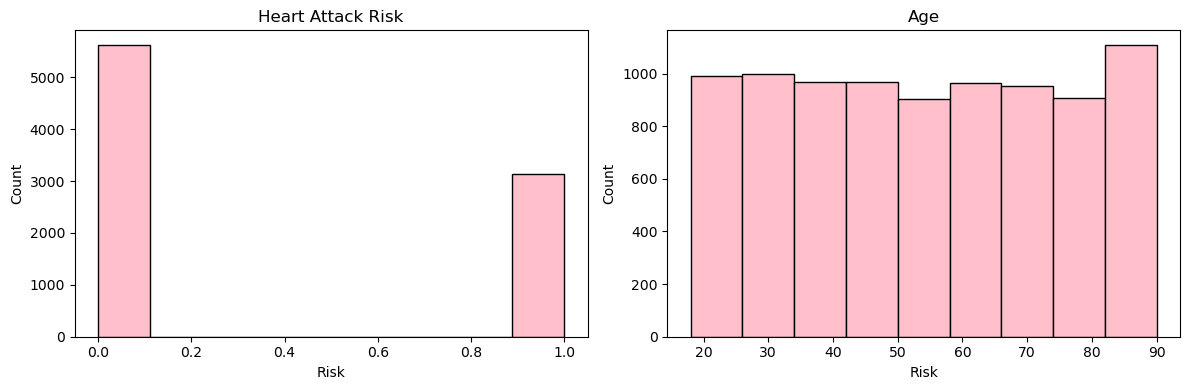

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df['Heart Attack Risk'], bins=9, edgecolor='black', color='pink')
axes[0].set_title('Heart Attack Risk')
axes[0].set_xlabel('Risk')
axes[0].set_ylabel('Count')


axes[1].hist(df["Age"], bins=9, edgecolor='black', color='pink')
axes[1].set_title('Age')
axes[1].set_xlabel('Risk')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



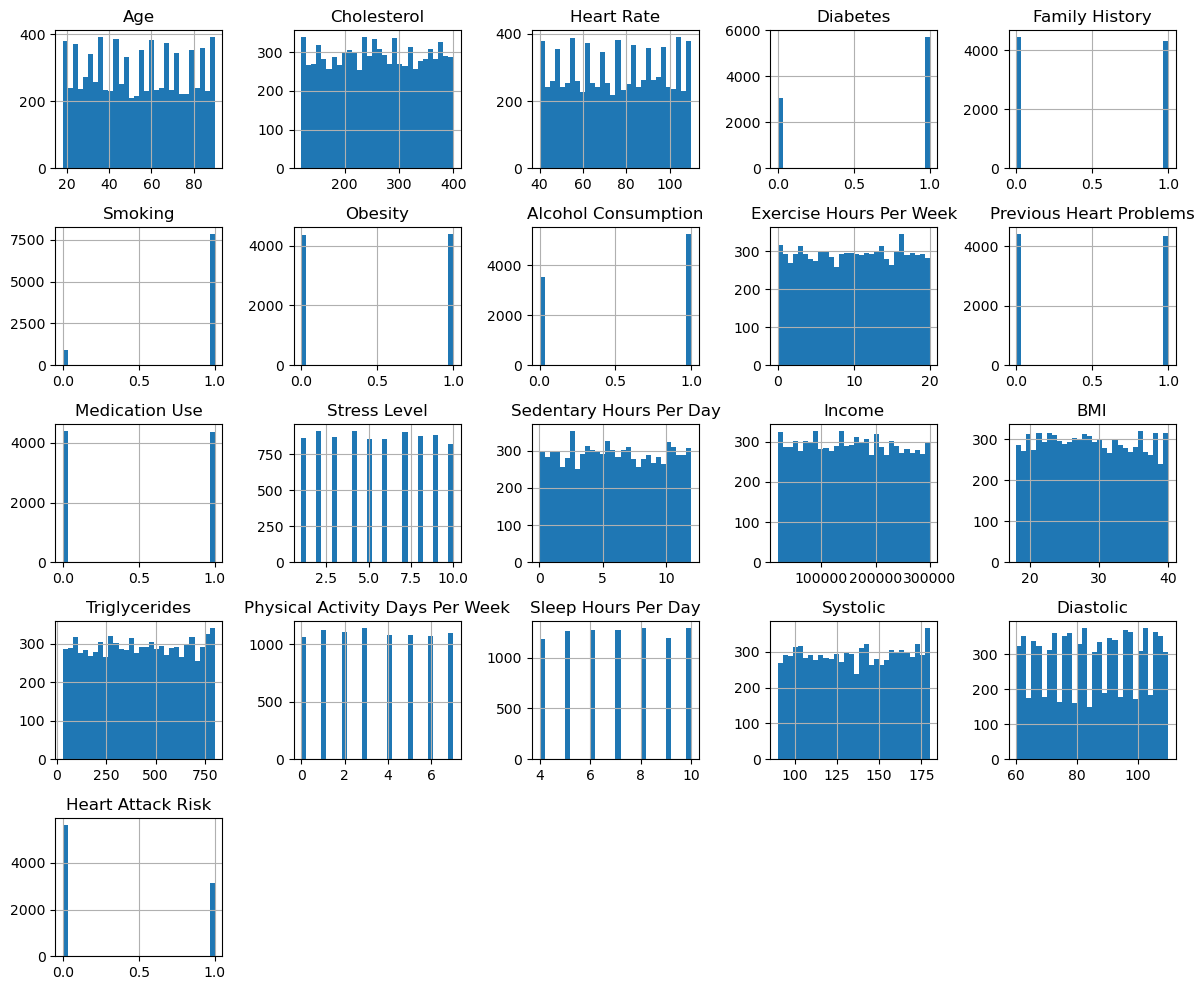

In [114]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


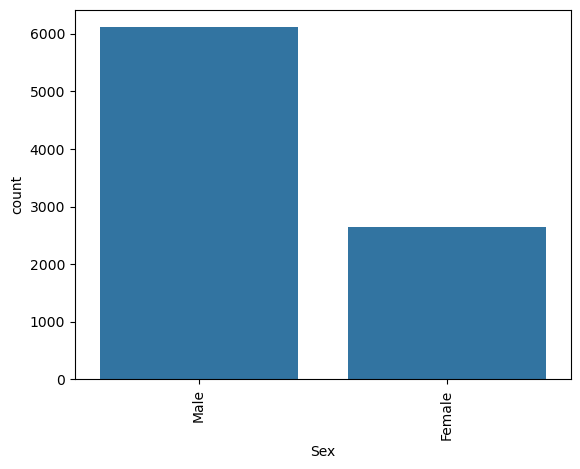

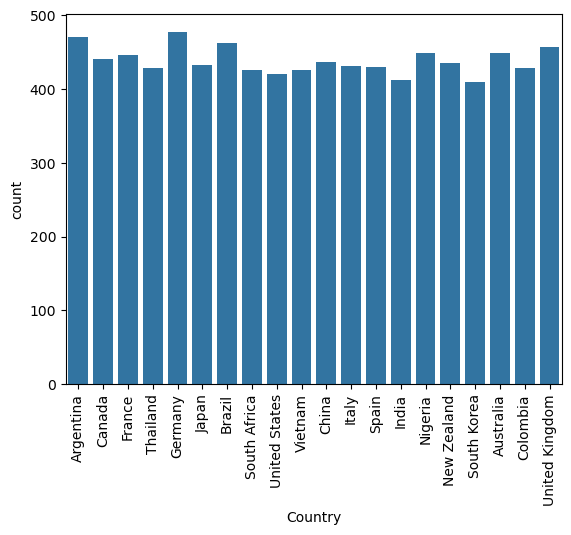

In [115]:
#categorical features
categorical_cols = ['Sex', 'Country']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic', 'Diastolic', 'Heart Attack Risk']
Categorical Columns: ['Patient ID', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']


In [14]:
#Identify  inconsistencies
print(df['Cholesterol'].unique()>500)
print(df['Heart Rate'].unique())


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [15]:
print(df['Stress Level'].unique())
print(df['BMI'].unique())
print(df['Triglycerides'].unique())

[ 9  1  6  2  7  4  5  8 10  3]
[31.25123273 27.19497335 28.17657068 ... 35.40614616 27.29402009
 32.91415086]
[286 235 587 378 231 795 284 370 790 232 469 523 590 506 635 773  68 402
 517 247 747 360 358 526 605 667 316 551 482 718 297 661 558 209 586 743
 411 785 697 519 595 452 158 679 675 792 584 366 741 474  92 410 398 493
 614 682 106 216 408 628 481  67  82 305 164 211 511 766 547 327 367 681
 131  42 692 664 543 689 569 458 683 779 136 643 653  55 275 314 760 404
 576 690 648 385 255 468 784 509 205 109 530 654 331 485 250 113 377 180
 229 602 285 471 554 344 416 445 709 426 528 388 441 306 749 347 341 451
 356 336 455 223 262 239 555 363 489 788 121 553 617 174 167 563 665  65
 657 237 141 767 292 214 221 447 634 460 711  97 267 695 717 383 332 449
 701 524 549  31 276 744 128  52 394  54 739 407 751 436 473 218 129 579
 492 696 202 197 521 325  35 123 694 434 248 348 750 431 714 649 668 401
 610 244 691  88 532 777 420 350 652 413 754 753 457 122 312 778 676 775
 183 601 317 

In [16]:
#Identify outliers
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")



Column: Age, Outliers: 0
Column: Cholesterol, Outliers: 0
Column: Heart Rate, Outliers: 0
Column: Diabetes, Outliers: 0
Column: Family History, Outliers: 0
Column: Smoking, Outliers: 904
Column: Obesity, Outliers: 0
Column: Alcohol Consumption, Outliers: 0
Column: Exercise Hours Per Week, Outliers: 0
Column: Previous Heart Problems, Outliers: 0
Column: Medication Use, Outliers: 0
Column: Stress Level, Outliers: 0
Column: Sedentary Hours Per Day, Outliers: 0
Column: Income, Outliers: 0
Column: BMI, Outliers: 0
Column: Triglycerides, Outliers: 0
Column: Physical Activity Days Per Week, Outliers: 0
Column: Sleep Hours Per Day, Outliers: 0
Column: Systolic, Outliers: 0
Column: Diastolic, Outliers: 0
Column: Heart Attack Risk, Outliers: 0


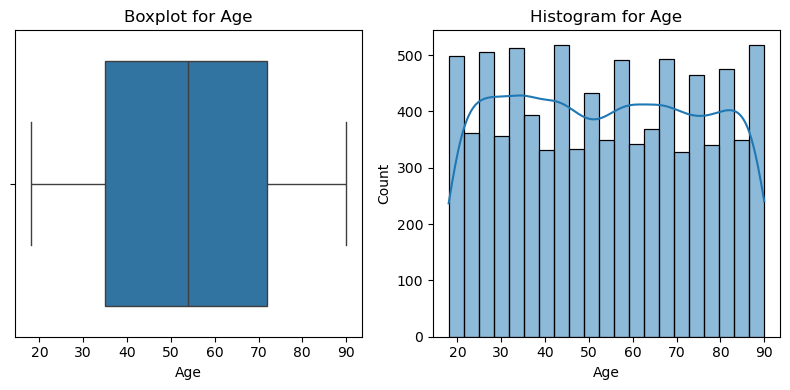

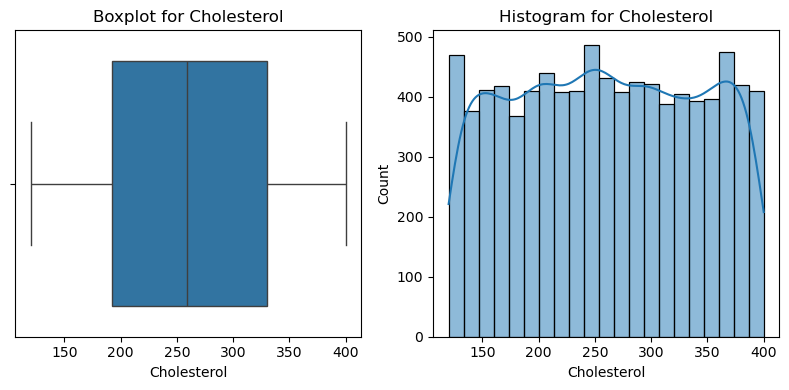

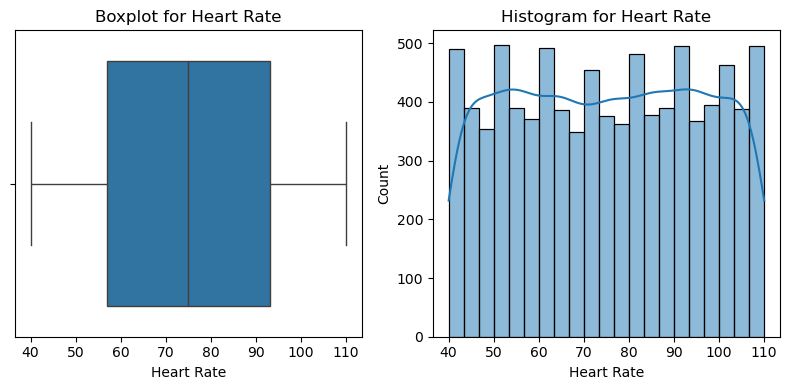

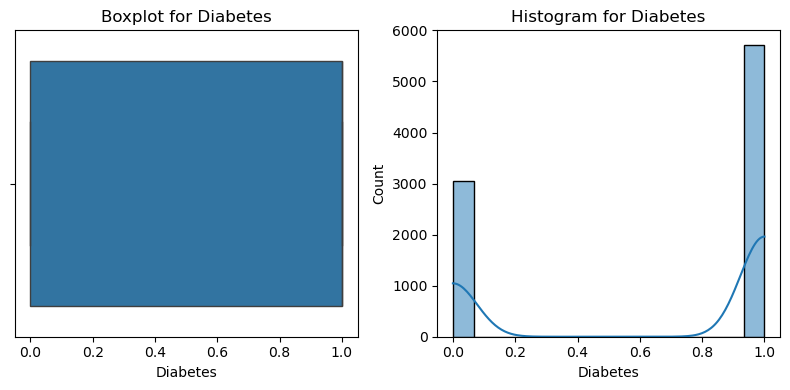

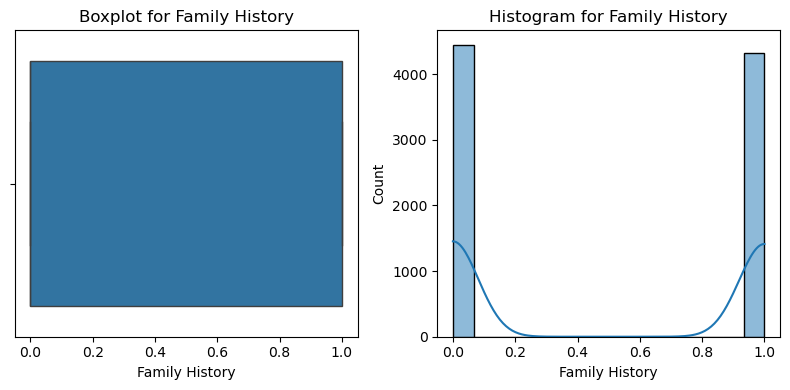

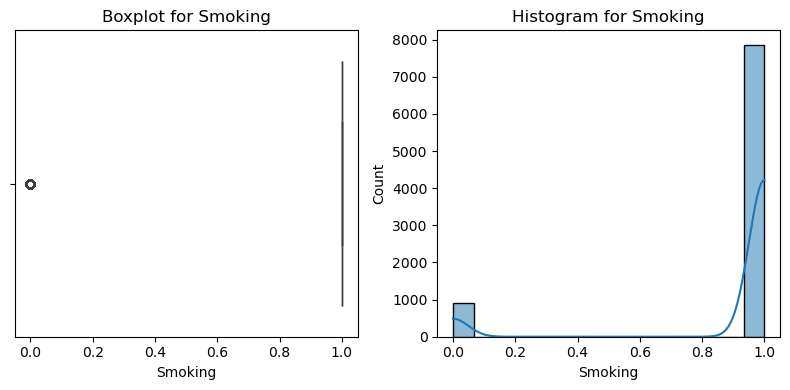

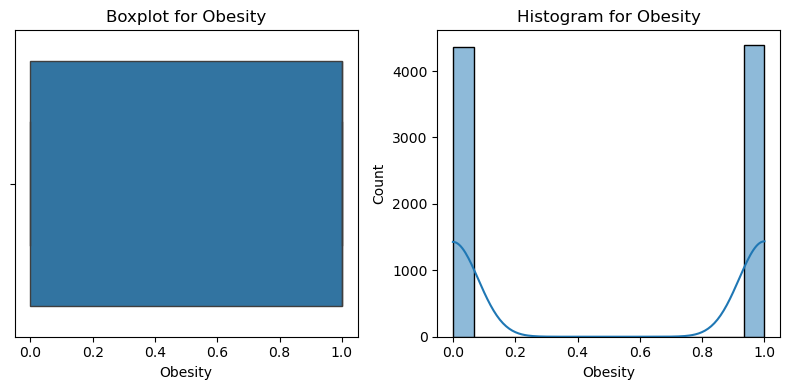

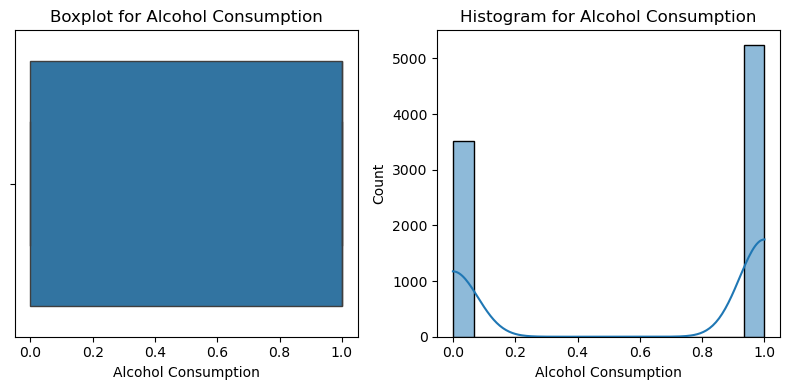

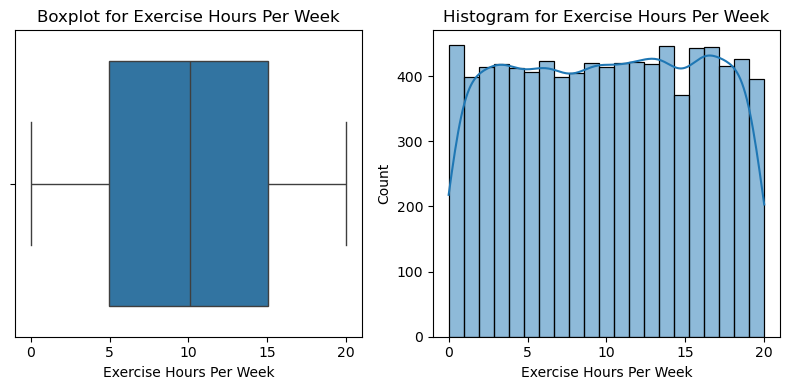

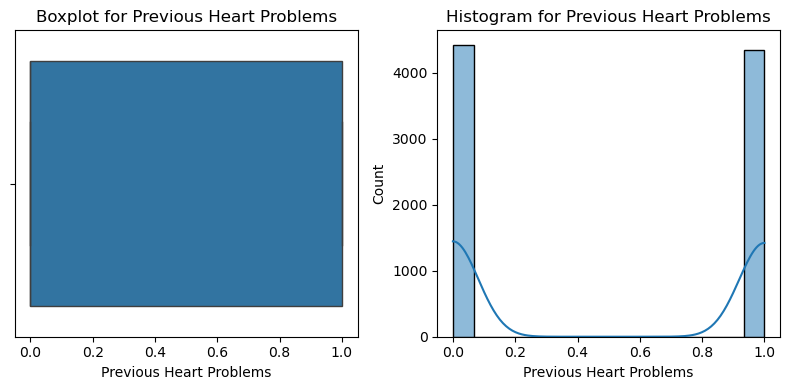

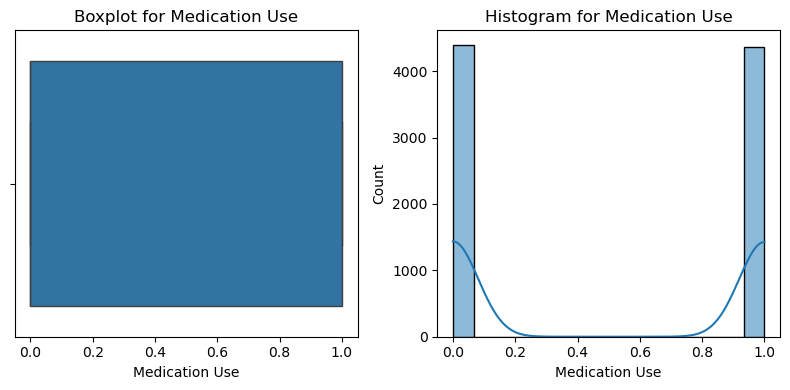

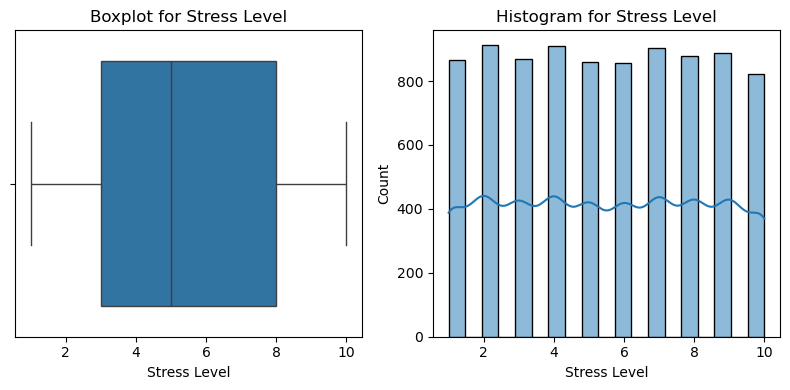

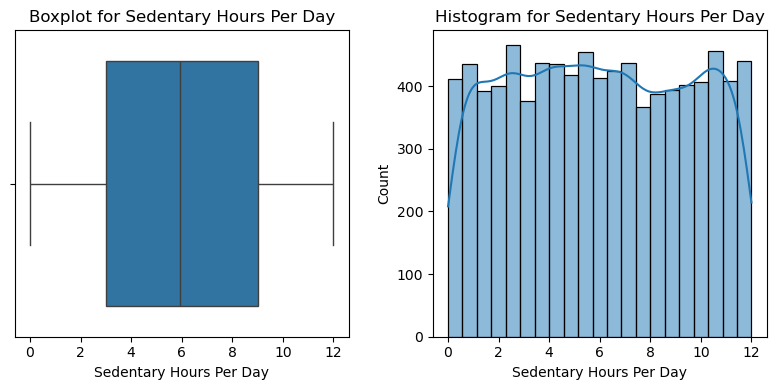

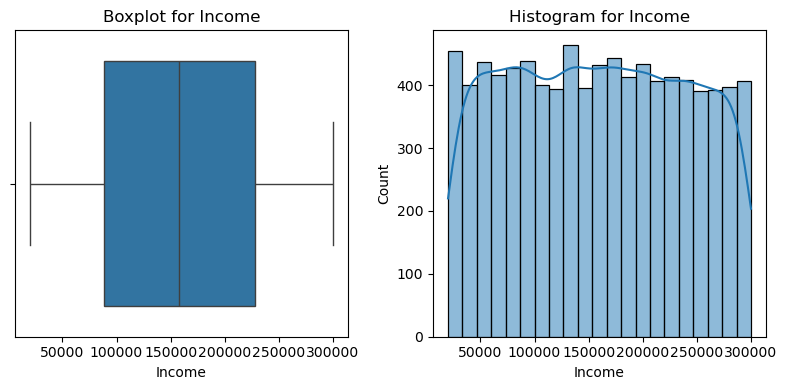

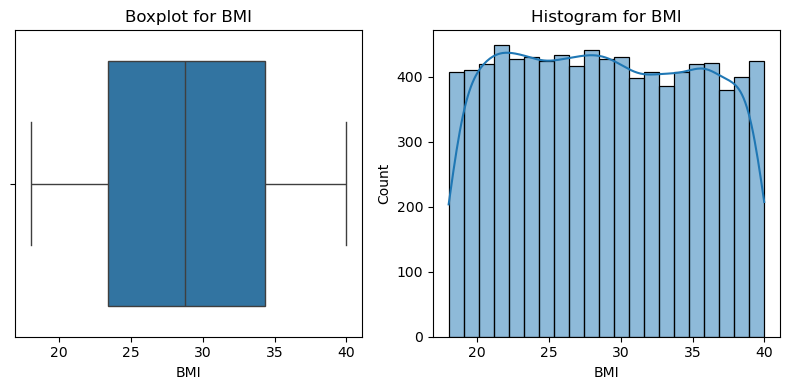

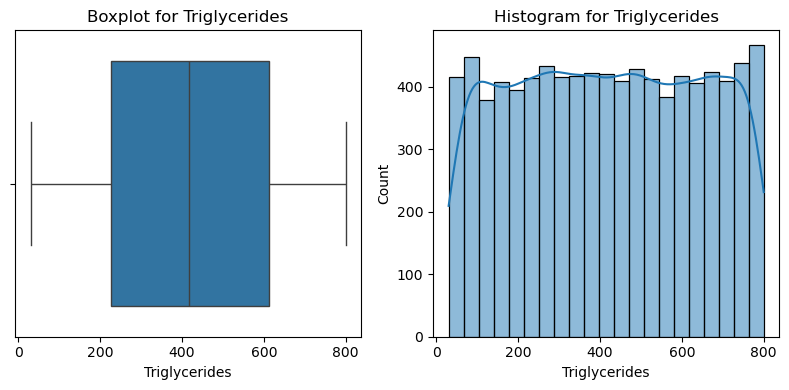

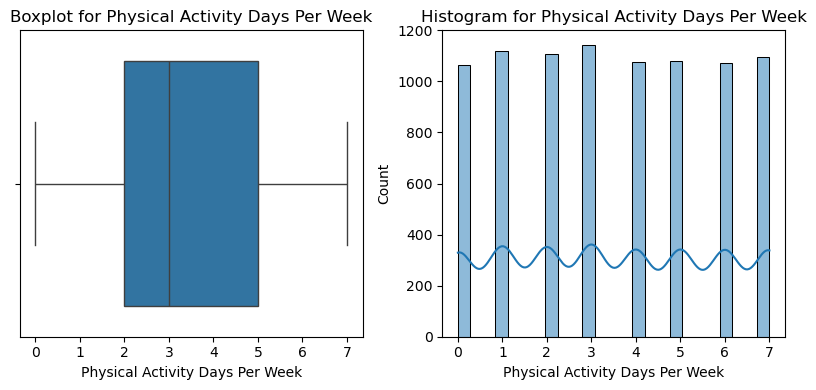

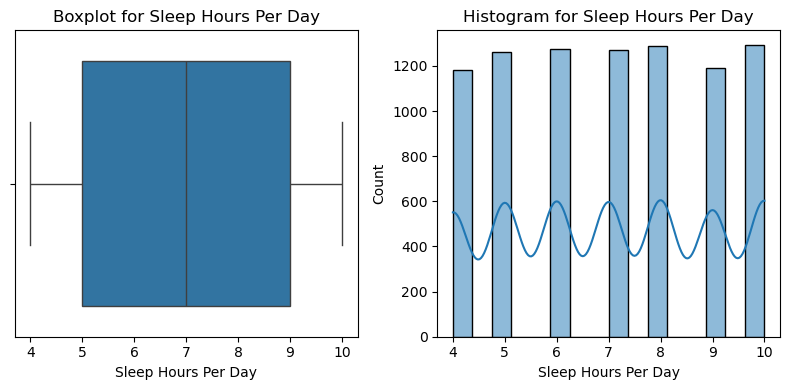

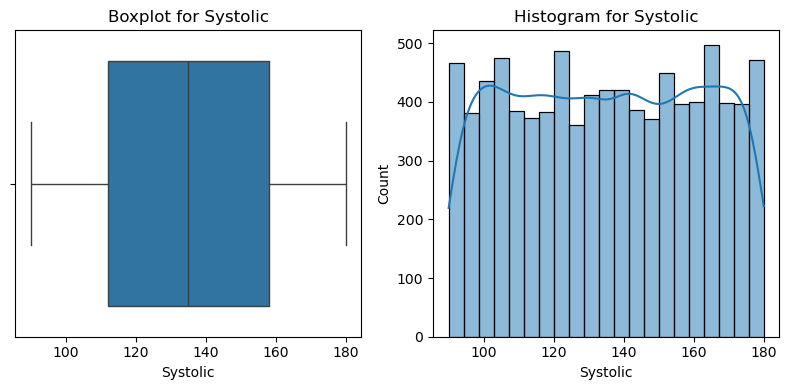

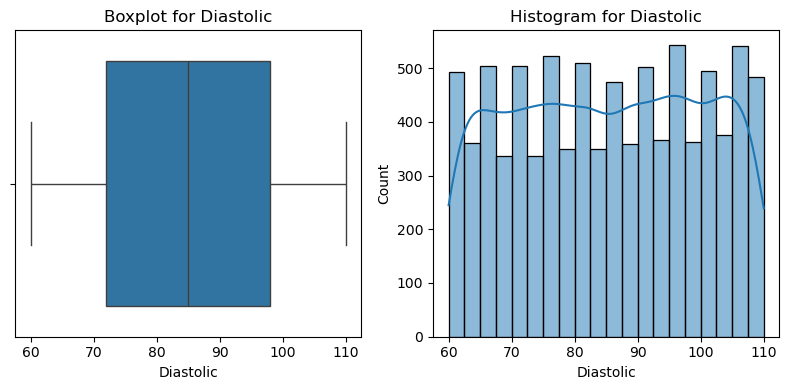

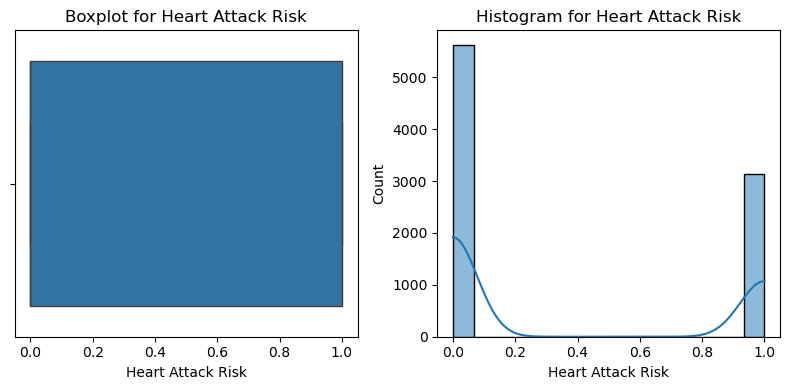

In [120]:
# visualize the outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    
    plt.tight_layout()
    plt.show()


In [121]:
fig = px.histogram(df[df["Heart Attack Risk"] == 1], x=df["Age"], nbins=10, title="Effect of Age on Heart Attack Risk",labels={'x':'Age', 'y':'count'})
fig.show()

In [122]:
# Effect of sex on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Sex", values="Heart Attack Risk",
    title="Effect of sex on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()

In [123]:
# Effect of Diabetes on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Diabetes", values="Heart Attack Risk",
    title="Effect of Diabetes on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()

In [124]:
# Effect of Family History on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Family History", values="Heart Attack Risk",
    title="Effect of Family History on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()

In [125]:
# Effect of Smoking on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Smoking", values="Heart Attack Risk",
    title="Effect of Smoking on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()

In [126]:
# Effect of Obesity on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Obesity", values="Heart Attack Risk",
    title="Effect of Obesity on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()

In [127]:
# Effect of Alcohol Consumption on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Alcohol Consumption", values="Heart Attack Risk",
    title="Effect of Alcohol Consumption on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()


In [128]:
# Effect of Previous Heart Problems on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Previous Heart Problems", values="Heart Attack Risk",
    title="Effect of Previous Heart Problems on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()


In [129]:
# Effect of Medication Use on Heart Attack Risk:
pie_fig = px.pie(
    df, names="Medication Use", values="Heart Attack Risk",
    title="Effect of Medication Use on Heart Attack Risk"
)
pie_fig.update_traces(textposition='outside', textinfo='percent+label')
pie_fig.show()

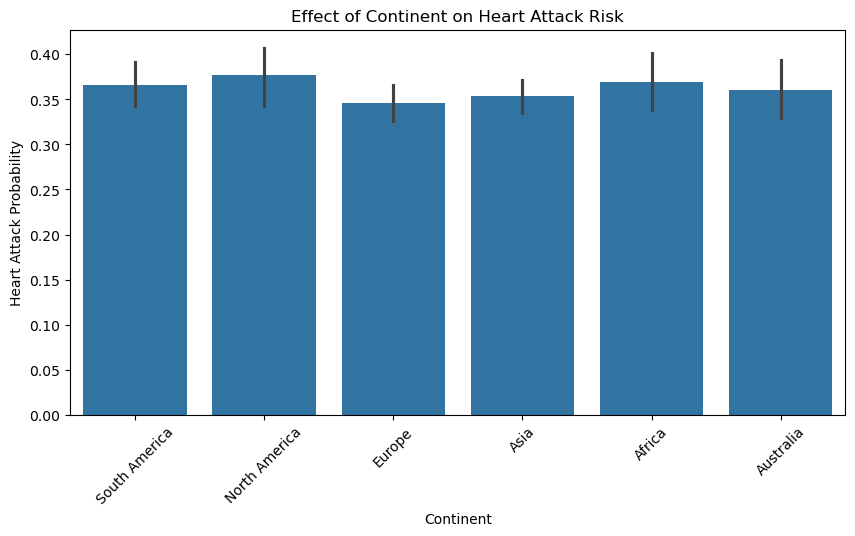

In [130]:
# Effect of Continent on Heart Attack Risk:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Continent'], y=df['Heart Attack Risk'])
plt.title("Effect of Continent on Heart Attack Risk")
plt.xlabel("Continent")
plt.ylabel("Heart Attack Probability")
plt.xticks(rotation=45)
plt.show()

In [17]:
#Encode categorical variables if necessary
le_Sex = LabelEncoder()
le_Diet = LabelEncoder()
le_Country= LabelEncoder()
le_Continent= LabelEncoder()
le_Hemisphere= LabelEncoder()
df['Sex'] = le_Sex.fit_transform(df['Sex']) 
df['Diet'] =le_Diet.fit_transform(df['Diet'])
df['Country'] =le_Diet.fit_transform(df['Country'])
df['Continent'] =le_Diet.fit_transform(df['Continent'])
df['Hemisphere'] =le_Diet.fit_transform(df['Hemisphere'])
df.head(5)


Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    1          208          72         0               0   
1    CZE1114   21    1          389          98         1               1   
2    BNI9906   21    0          324          72         1               0   
3    JLN3497   84    1          383          73         1               1   
4    GFO8847   66    1          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...        BMI  Triglycerides  \
0        1        0                    0  ...  31.251233            286   
1        1        1                    1  ...  27.194973            235   
2        0        0                    0  ...  28.176571            587   
3        1        0                    1  ...  36.464704            378   
4        1        1                    0  ...  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Country  Continent  \
0                                0                    6        0          5   
1                                1                    7        3          4   
2                                4                    4        6          3   
3                                3                    4        3          4   
4                                1                    5       16          1   

   Hemisphere  Systolic  Diastolic  Heart Attack Risk  
0           1       158         88                  0  
1           0       165         93                  0  
2           0       174         99                  0  
3           0       163        100                  0  
4           0        91         88                  0  

[5 rows x 27 columns]

In [18]:
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col])

df    

Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0            521   67    1          208          72         0               0   
1            998   21    1          389          98         1               1   
2            529   21    0          324          72         1               0   
3           3159   84    1          383          73         1               1   
4           2083   66    1          318          93         1               1   
...          ...  ...  ...          ...         ...       ...             ...   
8758        4226   60    1          121          61         1               1   
8759        5502   28    0          120          73         1               0   
8760        7837   47    1          250         105         0               1   
8761        1552   36    1          178          60         1               0   
8762        8719   25    0          356          75         1               1   

      Smoking  Obesity  Alcohol Consumption  ...        BMI  Triglycerides  \
0           1        0                    0  ...  31.251233            286   
1           1        1                    1  ...  27.194973            235   
2           0        0                    0  ...  28.176571            587   
3           1        0                    1  ...  36.464704            378   
4           1        1                    0  ...  21.809144            231   
...       ...      ...                  ...  ...        ...            ...   
8758        1        0                    1  ...  19.655895             67   
8759        0        1                    0  ...  23.993866            617   
8760        1        1                    1  ...  35.406146            527   
8761        1        0                    0  ...  27.294020            114   
8762        0        0                    1  ...  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day  Country  \
0                                   0                    6        0   
1                                   1                    7        3   
2                                   4                    4        6   
3                                   3                    4        3   
4                                   1                    5       16   
...                               ...                  ...      ...   
8758                                7                    7       16   
8759                                4                    9        3   
8760                                4                    4        2   
8761                                2                    8        2   
8762                                7                    4       17   

      Continent  Hemisphere  Systolic  Diastolic  Heart Attack Risk  
0             5           1       158         88                  0  
1             4           0       165         93                  0  
2             3           0       174         99                  0  
3             4           0       163        100                  0  
4             1           0        91         88                  0  
...         ...         ...       ...        ...                ...  
8758          1           0        94         76                  0  
8759          4           0       157        102                  0  
8760          5           1       161         75                  1  
8761          5           1       119         67                  0  
8762          3           0       138         67                  1  

[8763 rows x 27 columns]

In [133]:
data_after_encoding=df.to_csv("data_after_encoding.csv",index=False)

In [26]:
#data scalling
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df[numeric_columns].head())
df



        Age       Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0  0.625557  0.658765    -0.641579   -0.147042 -1.369651       -0.986061   
1 -1.539322  0.658765     1.596895    1.118179  0.730113        1.014136   
2 -1.539322 -1.517992     0.793023   -0.147042  0.730113       -0.986061   
3  1.425621  0.658765     1.522691   -0.098380  0.730113        1.014136   
4  0.578495  0.658765     0.718820    0.874867  0.730113        1.014136   

    Smoking   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0  0.339157 -1.002857            -1.219867                -1.010838  ...   
1  0.339157  0.997151             0.819762                -1.418027  ...   
2 -2.948488 -1.002857            -1.219867                -1.372188  ...   
3  0.339157 -1.002857             0.819762                -0.032188  ...   
4  0.339157  0.997151            -1.219867                -0.727941  ...   

   Previous Heart Problems  Medication Use  Stress Level       BMI  \
0               

Age       Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0     0.625557  0.658765    -0.641579   -0.147042 -1.369651       -0.986061   
1    -1.539322  0.658765     1.596895    1.118179  0.730113        1.014136   
2    -1.539322 -1.517992     0.793023   -0.147042  0.730113       -0.986061   
3     1.425621  0.658765     1.522691   -0.098380  0.730113        1.014136   
4     0.578495  0.658765     0.718820    0.874867  0.730113        1.014136   
...        ...       ...          ...         ...       ...             ...   
8758  0.296119  0.658765    -1.717530   -0.682328  0.730113        1.014136   
8759 -1.209884 -1.517992    -1.729898   -0.098380  0.730113       -0.986061   
8760 -0.315695  0.658765    -0.122154    1.458815 -1.369651        1.014136   
8761 -0.833383  0.658765    -1.012597   -0.730990  0.730113       -0.986061   
8762 -1.351072 -1.517992     1.188775   -0.001055  0.730113        1.014136   

       Smoking   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0     0.339157 -1.002857            -1.219867                -1.010838  ...   
1     0.339157  0.997151             0.819762                -1.418027  ...   
2    -2.948488 -1.002857            -1.219867                -1.372188  ...   
3     0.339157 -1.002857             0.819762                -0.032188  ...   
4     0.339157  0.997151            -1.219867                -0.727941  ...   
...        ...       ...                  ...                      ...  ...   
8758  0.339157 -1.002857             0.819762                -0.362578  ...   
8759 -2.948488  0.997151            -1.219867                 1.131536  ...   
8760  0.339157  0.997151             0.819762                -1.187161  ...   
8761  0.339157 -1.002857            -1.219867                -1.076238  ...   
8762 -2.948488 -1.002857             0.819762                 1.394931  ...   

      Previous Heart Problems  Medication Use  Stress Level       BMI  \
0                   -0.991704       -0.996696      1.234604  0.373454   
1                    1.008365       -0.996696     -1.563129 -0.268479   
2                    1.008365        1.003315      1.234604 -0.113134   
3                    1.008365       -0.996696      1.234604  1.198524   
4                    1.008365       -0.996696      0.185454 -1.120826   
...                       ...             ...           ...       ...   
8758                 1.008365        1.003315      0.884887 -1.461594   
8759                -0.991704       -0.996696      0.884887 -0.775078   
8760                 1.008365       -0.996696     -0.164263  1.030999   
8761                 1.008365        1.003315     -0.164263 -0.252804   
8762                -0.991704       -0.996696      0.884887  0.636623   

      Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0         -0.588539                        -1.528843            -0.514750   
1         -0.816487                        -1.090738            -0.011823   
2          0.756800                         0.223577            -1.520604   
3         -0.177339                        -0.214528            -1.520604   
4         -0.834365                        -1.090738            -1.017677   
...             ...                              ...                  ...   
8758      -1.567374                         1.537893            -0.011823   
8759       0.890887                         0.223577             0.994032   
8760       0.488626                         0.223577            -1.520604   
8761      -1.357305                        -0.652633             0.491104   
8762      -1.062313                         1.537893            -1.520604   

      Systolic  Diastolic  Heart Attack Risk  
0     0.870044   0.193782          -0.747090  
1     1.135714   0.534480          -0.747090  
2     1.477290   0.943319          -0.747090  
3     1.059809   1.011458          -0.747090  
4    -1.672797   0.193782          -0.747090  
...        ...        ...    

In [20]:
df.to_csv("data_after_normalization.csv",index=False)

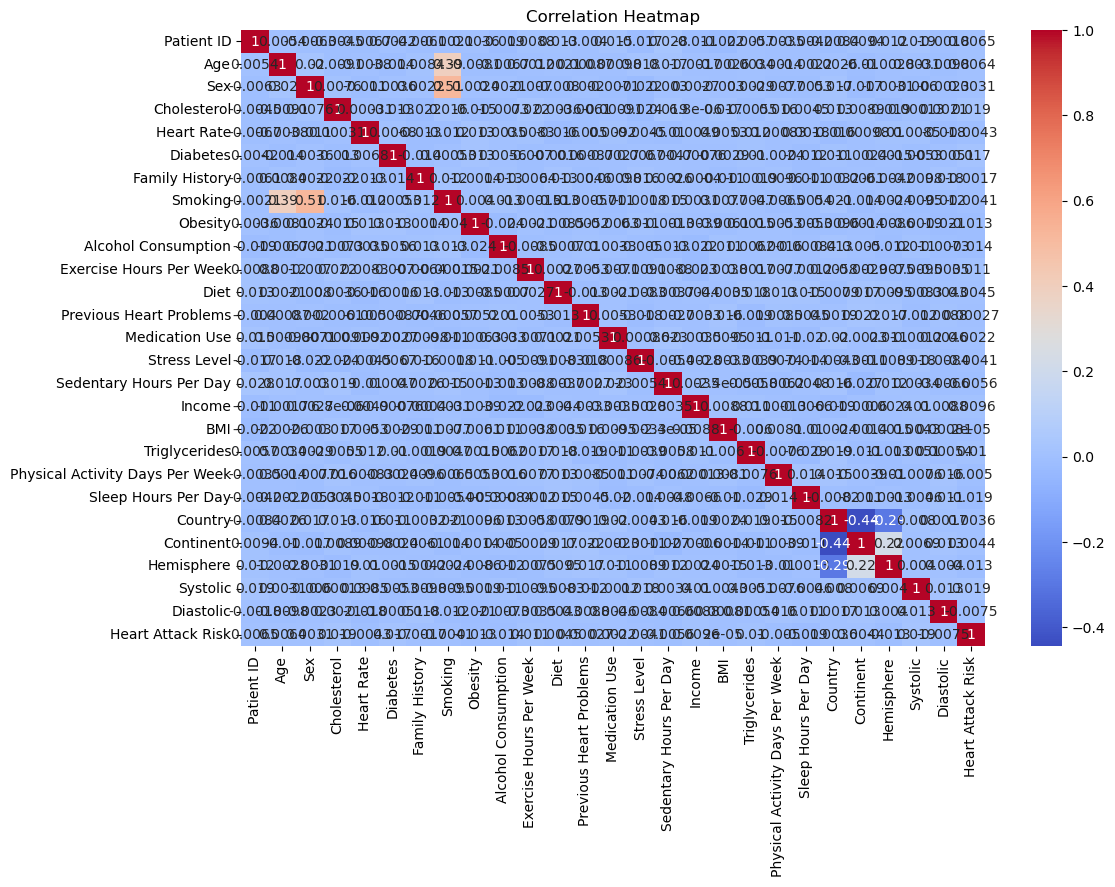

In [136]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
#remove features don't affect on risk
#Drop Unneeded columns
df.drop(['Sedentary Hours Per Day','Income','Country','Continent','Hemisphere','Sedentary Hours Per Day','Patient ID'],axis=1,inplace=True)
df

Age       Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0     0.625557  0.658765    -0.641579   -0.147042 -1.369651       -0.986061   
1    -1.539322  0.658765     1.596895    1.118179  0.730113        1.014136   
2    -1.539322 -1.517992     0.793023   -0.147042  0.730113       -0.986061   
3     1.425621  0.658765     1.522691   -0.098380  0.730113        1.014136   
4     0.578495  0.658765     0.718820    0.874867  0.730113        1.014136   
...        ...       ...          ...         ...       ...             ...   
8758  0.296119  0.658765    -1.717530   -0.682328  0.730113        1.014136   
8759 -1.209884 -1.517992    -1.729898   -0.098380  0.730113       -0.986061   
8760 -0.315695  0.658765    -0.122154    1.458815 -1.369651        1.014136   
8761 -0.833383  0.658765    -1.012597   -0.730990  0.730113       -0.986061   
8762 -1.351072 -1.517992     1.188775   -0.001055  0.730113        1.014136   

       Smoking   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0     0.339157 -1.002857            -1.219867                -1.010838  ...   
1     0.339157  0.997151             0.819762                -1.418027  ...   
2    -2.948488 -1.002857            -1.219867                -1.372188  ...   
3     0.339157 -1.002857             0.819762                -0.032188  ...   
4     0.339157  0.997151            -1.219867                -0.727941  ...   
...        ...       ...                  ...                      ...  ...   
8758  0.339157 -1.002857             0.819762                -0.362578  ...   
8759 -2.948488  0.997151            -1.219867                 1.131536  ...   
8760  0.339157  0.997151             0.819762                -1.187161  ...   
8761  0.339157 -1.002857            -1.219867                -1.076238  ...   
8762 -2.948488 -1.002857             0.819762                 1.394931  ...   

      Previous Heart Problems  Medication Use  Stress Level       BMI  \
0                   -0.991704       -0.996696      1.234604  0.373454   
1                    1.008365       -0.996696     -1.563129 -0.268479   
2                    1.008365        1.003315      1.234604 -0.113134   
3                    1.008365       -0.996696      1.234604  1.198524   
4                    1.008365       -0.996696      0.185454 -1.120826   
...                       ...             ...           ...       ...   
8758                 1.008365        1.003315      0.884887 -1.461594   
8759                -0.991704       -0.996696      0.884887 -0.775078   
8760                 1.008365       -0.996696     -0.164263  1.030999   
8761                 1.008365        1.003315     -0.164263 -0.252804   
8762                -0.991704       -0.996696      0.884887  0.636623   

      Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0         -0.588539                        -1.528843            -0.514750   
1         -0.816487                        -1.090738            -0.011823   
2          0.756800                         0.223577            -1.520604   
3         -0.177339                        -0.214528            -1.520604   
4         -0.834365                        -1.090738            -1.017677   
...             ...                              ...                  ...   
8758      -1.567374                         1.537893            -0.011823   
8759       0.890887                         0.223577             0.994032   
8760       0.488626                         0.223577            -1.520604   
8761      -1.357305                        -0.652633             0.491104   
8762      -1.062313                         1.537893            -1.520604   

      Systolic  Diastolic  Heart Attack Risk  
0     0.870044   0.193782          -0.747090  
1     1.135714   0.534480          -0.747090  
2     1.477290   0.943319          -0.747090  
3     1.059809   1.011458          -0.747090  
4    -1.672797   0.193782          -0.747090  
...        ...        ...    

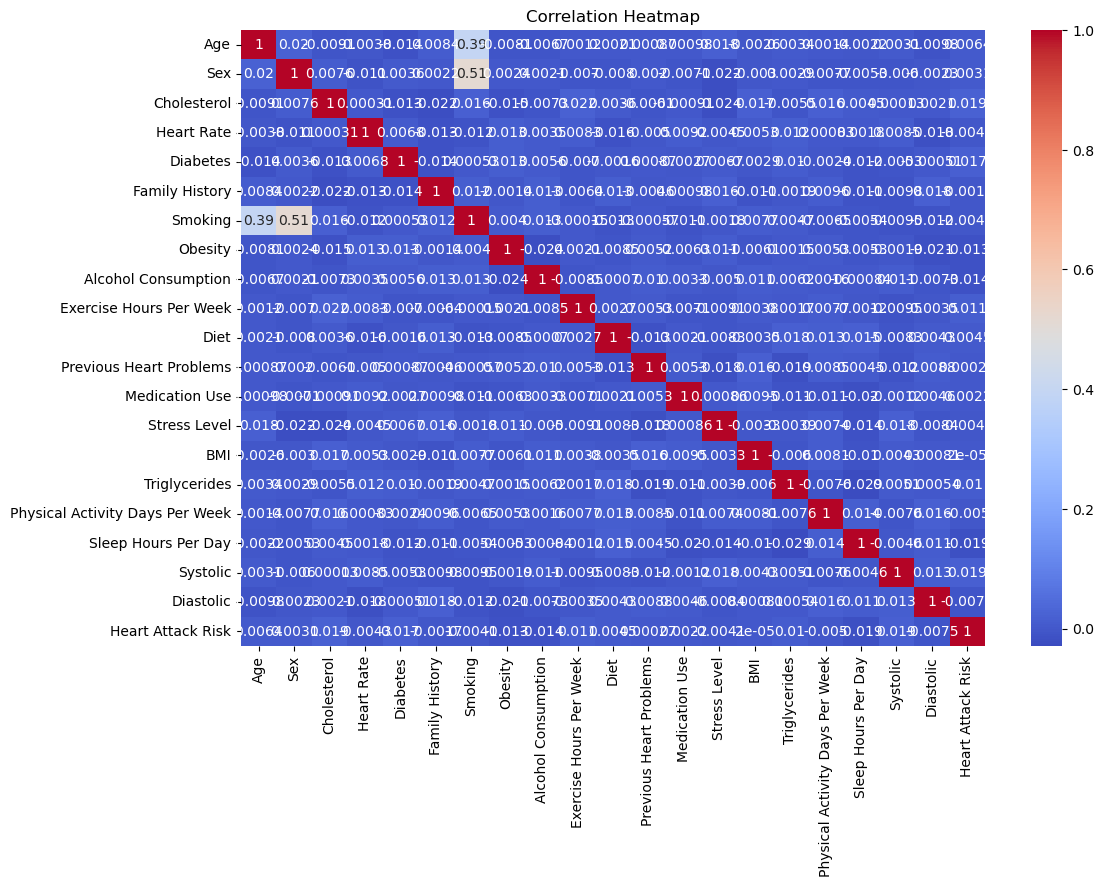

In [138]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df.to_csv("cleaned_data.csv",index=False)


In [31]:
X = df.drop('Heart Attack Risk', axis=1) 
y = df['Heart Attack Risk'] 


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
new= DecisionTreeRegressor()
new.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
train_pred=new.predict(X_train)
test_pred=new.predict(X_test)
print(mean_squared_error(y_train,train_pred))
print(mean_squared_error(y_test,test_pred))

4.252365400290868e-32
1.9205607111217275


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
train_pred=rf.predict(X_train)
test_pred=rf.predict(X_test)
print(mean_squared_error(y_train,train_pred))
print(mean_squared_error(y_test,test_pred))

0.14305731718612202
1.030118295259395


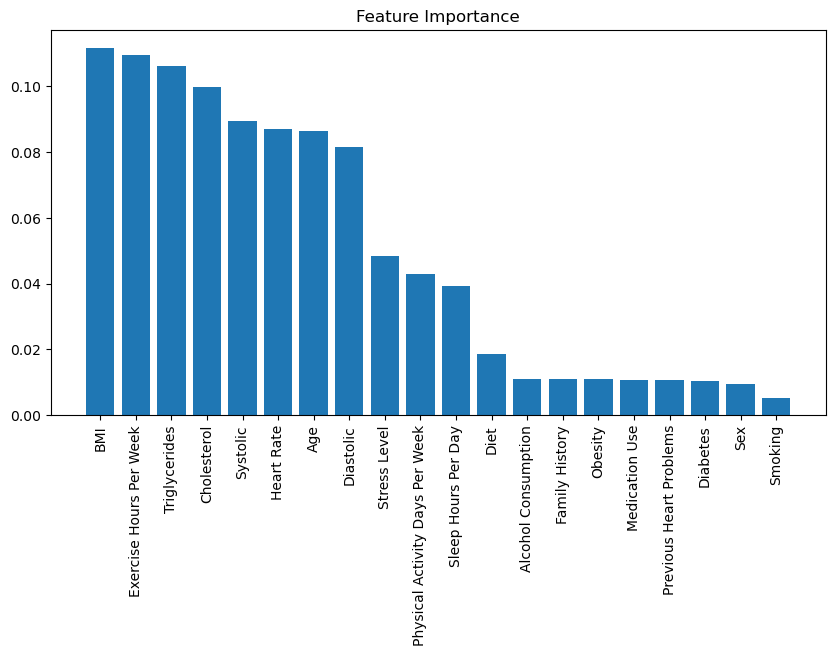

In [36]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()